In [ ]:
'''
The data set has been downloaded from the source https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
The code in this notebook 
Impports the dataset stroke_data.csv from the data folder
Collects the data in Pandas Dataframe.
Performs understastanding, anlysing and organising of the data 

'''

In [90]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from library.sb_utils import save_file


In [65]:
# Import data set downloaded into the data folder from Kaggel

stroke_data = pd.read_csv("../data/stroke_data.csv")

In [66]:
# Getting the dataset summary using info method 
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [100]:
# Checking the number of columns and rows
stroke_data.shape

(5110, 12)

In [67]:
# Checking the records using the head method
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [68]:
# Checking the data of the stroke field
stroke_data.stroke.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [69]:
# Geting the count of the records to check for null values
stroke_data.stroke.count()

5110

In [70]:
# Counting the number of missing values by each feature
# Using pd.concat to get the tabular representation of the missing values

missing = pd.concat([stroke_data.isnull().sum(), 100*stroke_data.isnull().mean()], axis=1) 
missing.columns=['count','%']
missing.sort_values(by='count')

,count,%
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
smoking_status,0,0.000000


In [71]:
# bmi feature has 201 missing values. These missing values contribute to 3.9% of the total number of records
# Checking the values for other features corresponding to null bmi feature 
stroke_data[stroke_data.bmi.isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


Text(0.5, 1.0, 'BMI Vs Stroke')

<Figure size 576x432 with 0 Axes>

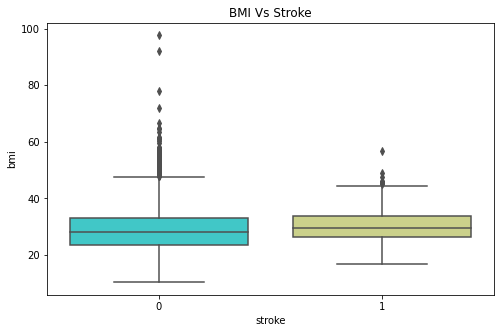

In [96]:
# Rest of the records for other features are looking valid/sensible
#Cecking for the relationship between bmi and stroke
plt.figure(figsize=(8,6))

#sns.histplot(stroke_data, x=stroke_data.bmi, hue='stroke')
#plt.pie(stroke_data.bmi, labels=list(stroke_data.stroke), colors=['lightcoral', 'lightskyblue'])
#plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=stroke_data.stroke, y=stroke_data.bmi, data=stroke_data, palette='rainbow')
plt.title("BMI Vs Stroke")



In [ ]:
# There doesnt seem to be corelation between people with BMI around 30 and stroke. Also, there are number of outliers in bmi

In [74]:
#Checking for the unique values in Gender
stroke_data.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [75]:
#Checking for the number of records for gender = 'Other'
stroke_data[stroke_data.gender=='Other'].count()

id                   1
gender               1
age                  1
hypertension         1
heart_disease        1
ever_married         1
work_type            1
Residence_type       1
avg_glucose_level    1
bmi                  1
smoking_status       1
stroke               1
dtype: int64

In [80]:
'''
Since there is only one record for gender type 'Other', it is safe to delete this record since it is 
not going to have any significance on the outcome of the model
'''

# Droping the record with gender type='Other' and saving it in new dataframe df

df = stroke_data.drop(stroke_data[stroke_data.gender=='Other'].index)
df.gender.unique()

array(['Male', 'Female'], dtype=object)

In [81]:
# Checking for the features with object data type
df.select_dtypes(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


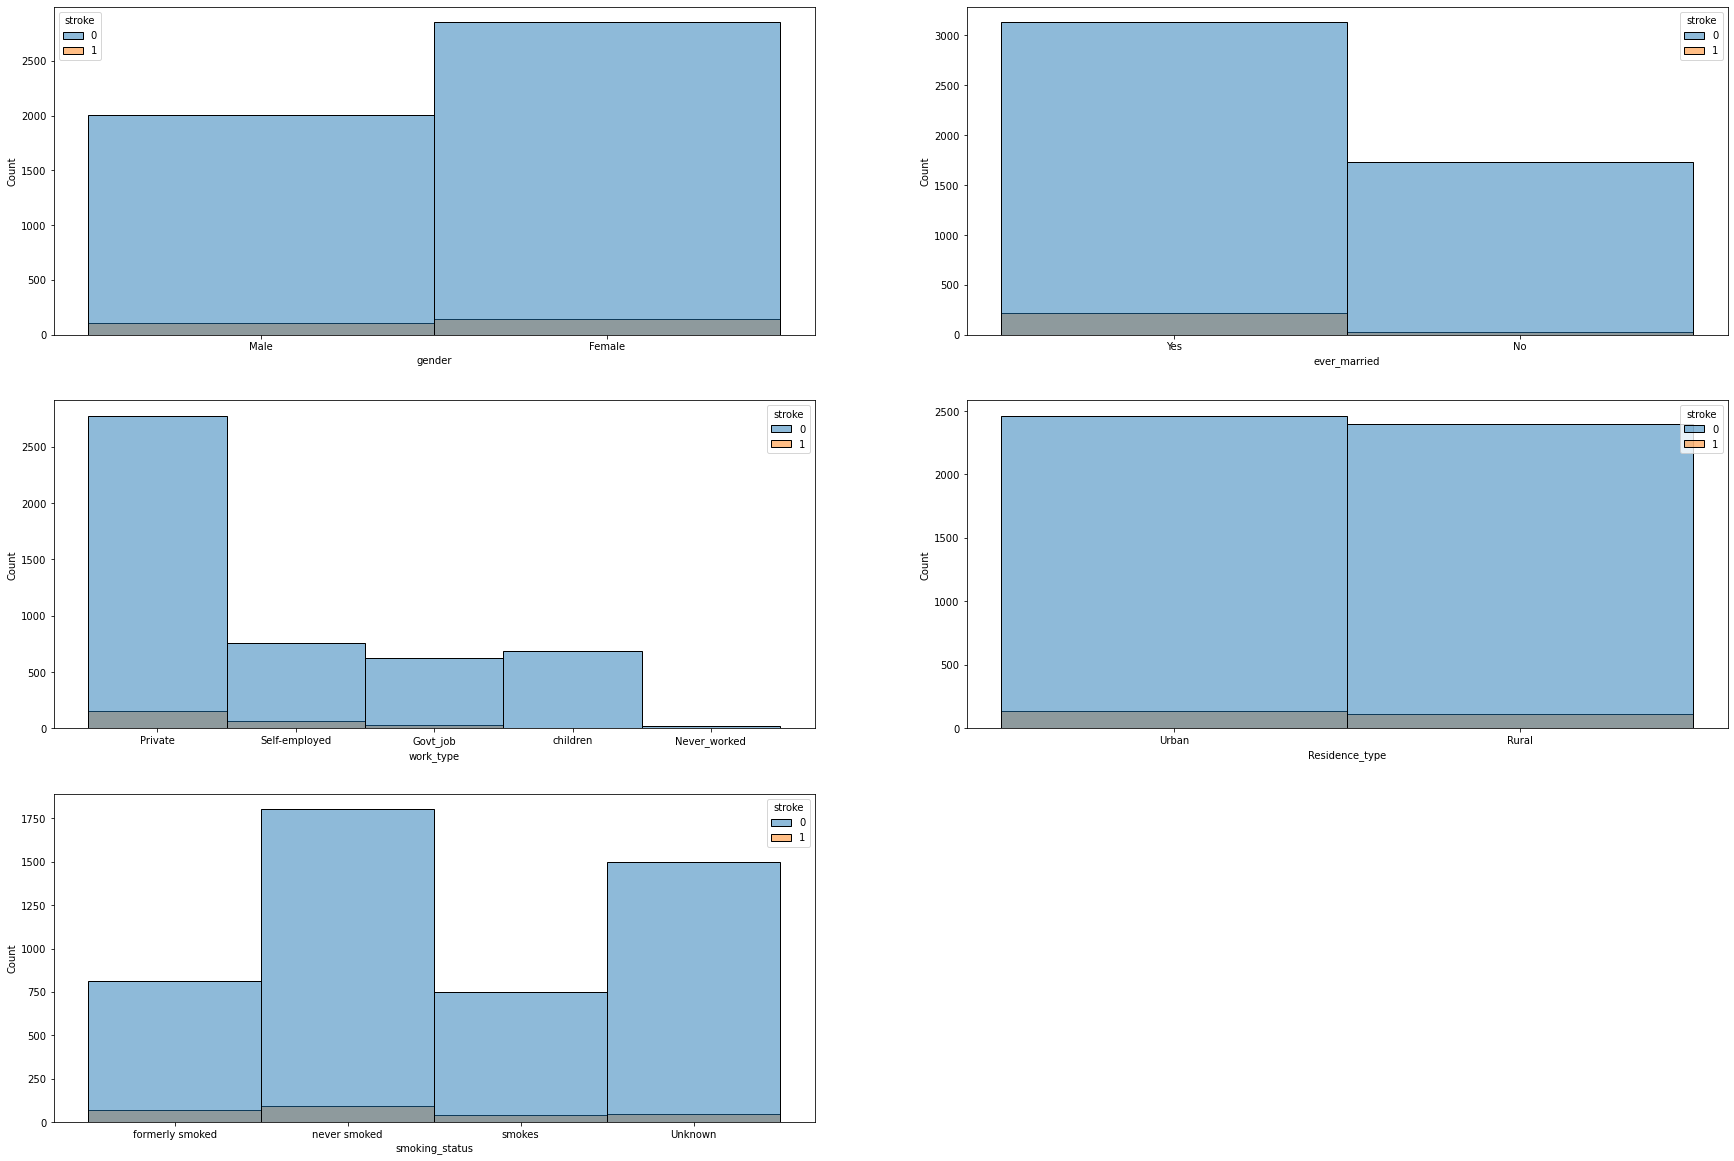

In [82]:
#Checking for the relation between object features and stroke
plt.figure(figsize=(30,35))

obj_data = df.select_dtypes(include='object')
i=0
for records in obj_data:
    i = i+1
    plt.subplot(5,2,i)
    sns.histplot(df, x=records, hue='stroke')

plt.show()

In [101]:
#There seems to be some correlation between few of the features like, gender, work_type, residence_type, bmi

# Saving the dataset into new csv file for the Exploratory Data Analysis
datapath = '../data'
save_file(df, 'stroke_data_cleaned.csv', datapath)


Writing file.  "../data/stroke_data_cleaned.csv"
